# Projet de Machine Learning: ECG Heartbeat Classification

# 1. Introduction

Dans ce projet, nous essayons de mettre en pratique nos connaissances en apprentissage statistique pour faire la prévision de la catégorie des battements cardiaques.

   Notre jeu de données est constitué de 87554 electrocardiogrammes échantillonés à la fréquence de 125hz,c’est-à-dire une valeur toutes les 0,008 secondes. On a donc pour chacun des signaux 187 valeurs sur 1,488s. Ils sont répartis sur 5 catégories:
   
   
    -Normal
    Bloc de branche gauche / droite
    Évasion Arial
    Échappement nodal

    -Auriculaire prématuré
    Atrial aberrant prématuré
    Nodal prématuré
    Prématuré supra-ventriculaire

    -Contraction ventriculaire prématurée
    Évacuation ventriculaire

    -Fusion ventriculaire et normale

    -Rythmé
    Fusion du rythme et de la normale
    Inclassable.
    
   Ces classes ou catégories sont recodées préablement et respectivement en 0,1,2,3,et 4.
   



Dans l'article expliquant tout ce processus  [ici](https://arxiv.org/pdf/1805.00794.pdf) nous trouvons la signification suivantes des différents labels ou catégories :


| Category(data)        |  Category(Paper)     | Annotations  |
| ------------- |:-------------:| -----:|
|0|N| <ul><li>Normal</li><li>Left/Right bundle branch block</li><li>Arial escape</li><li>Nodal escape</li></ul>  |
|1|S| <ul><li>Atrial premature</li><li>Aberrant atrial premature</li><li>Nodal premature</li><li>Supra-ventricular premature</li></ul> |
|2|V| <ul><li>Premature ventricular contraction</li><li>Ventricular escape</li></ul> |
|3|F| <ul><li>Fusion of ventricular and normal</li></ul> |
|4|Q| <ul><li>Paced</li><li>Fusion of paced and normal</li><li>Unclassifiable</li></ul> |



Dans ce projet de Machine Learning, nous ne travaillons pas sur les signaux directement. Néanmoins, nous allons nous en servir pour calculer un ensemble de variables ou features sur lesquelles nous allons travailler. 

Nous allons dans un premier temps répartir les données en échantillons d'apprentissage et de validation, ensuite rééquilibrer les classes, calculer nos features et visualiser nos données à travers une ACP et une AFD , puis normaliser nos données avant d'implémenter nos différents algorithmes de classifications.

# 2. Chargement des Librairies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
import scipy as sc
sb.set_style("whitegrid")
import matplotlib.pyplot as plt
import random

CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(5)]
NAME_DIC = {k:v for k,v in zip([0,1,2,3,4],['N','S','V','F','Q'])}

# 3. Lecture des données


Dans cette partie, nous chargeons les deux jeux de données d'apprentissage(train) et de validation (test), ici nos signaux et en visualisons quelques à titre illustratif.

Les données d'apprentissage sont presque 13 fois plus volumineux que les données de validation. Ce qui est un point positif et justifie le fait qu'il n'y ait pas de validation croisée Monte Carlo implémentée dans ce calepin.

## 3.1 Chargement des données

In [2]:
# Nom des colonnes
Colnames = [str(k) for k in range(187)] + ["label"]

In [103]:
# Train
mitbih_train_0 = pd.read_csv("mitbih_train.csv.zip", header=None, names=Colnames)
N_train1 = mitbih_train_0.shape[0]
print(mitbih_train_0.shape)
mitbih_train_0.head(5)

(87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Test
mitbih_test_0 = pd.read_csv("mitbih_test.csv", header=None, names = Colnames)
N_test = mitbih_test_0.shape[0]
print(mitbih_test_0.shape)
mitbih_test_0.head(5)

(6774, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,1.000000,0.758982,0.473054,0.193114,0.142216,0.176647,0.161677,0.142216,0.121257,0.107784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.746556,0.088154,0.035813,0.212121,0.253444,0.269972,0.283747,0.275482,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.972840,0.728395,0.000000,0.037037,0.162963,0.143210,0.123457,0.140741,0.133333,0.096296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.694444,0.238095,0.321429,0.337302,0.337302,0.301587,0.325397,0.325397,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.939815,0.791667,0.199074,0.000000,0.055556,0.101852,0.106481,0.143519,0.222222,0.189815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
mitbih_train_0=mitbih_train_0.sort_values(by='label')
mitbih_test_0=mitbih_test_0.sort_values(by='label')

In [6]:
import collections
collections.Counter(mitbih_test_0.label)

Counter({0.0: 3000, 1.0: 556, 2.0: 1448, 3.0: 162, 4.0: 1608})

## 3.2 Représentation d'un signal

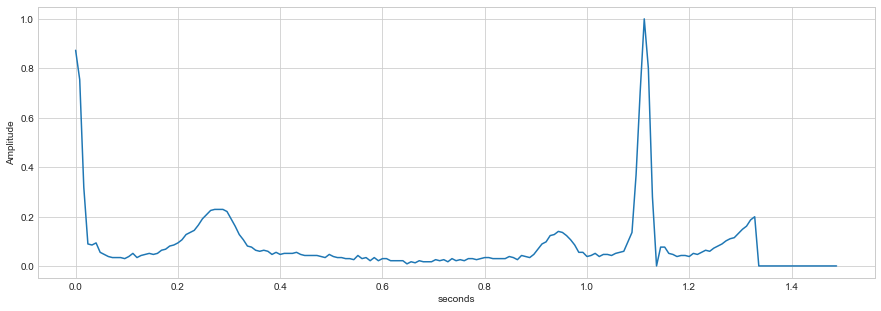

In [7]:
xsec = np.arange(187)*0.008

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,mitbih_train_0.values[1,:-1])
ax.set_xlabel("seconds")
ax.set_ylabel("Amplitude")
plt.show()

## 3.3 Représentation des signaux en fonction des catégories

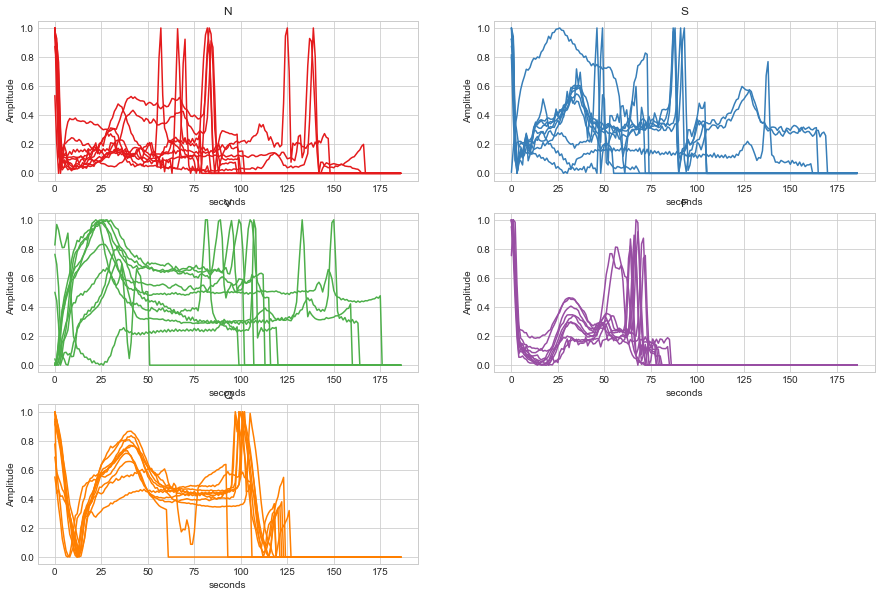

In [8]:
fig = plt.figure(figsize=(15,10))
for i,(k,v) in enumerate(mitbih_train_0.groupby("label")):
    ax = fig.add_subplot(3,2,i+1)
    ax.plot(v.values[:10,:-1].T, color=COLOR[int(k)])
    ax.set_title(NAME_DIC[k])
    ax.set_xlabel("seconds")
    ax.set_ylabel("Amplitude")
plt.show()

Les représentations ci-dessus nous permettent de nous familiariser avec les signaux, les électrocardiogrammes qui  sont nos données d'étude, ainsi que les catégories de battements cardiaques à notre disposition.

# 4. Répartition des catégories

Ici, nous répartissons les signaux des échantillons d'apprentissage et de validation dans les différentes catégories précédemment identifiées. 

## 4.1 Test

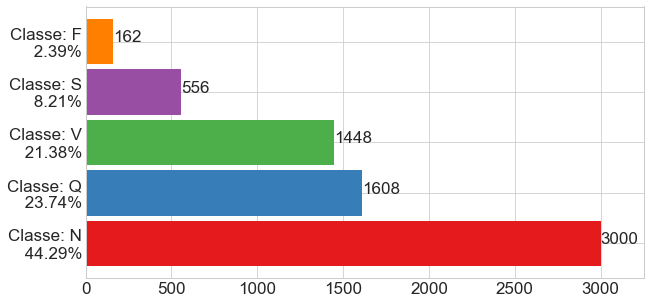

In [101]:
data_count = mitbih_test_0.label.astype(int).value_counts()
#Rename index to add percentage
new_index = ["Classe: " + NAME_DIC[k]+ "\n %.2f%%" %(v*100/N_test) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]),fontsize = 17)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0,3250)
plt.show()


## 4.2 Train

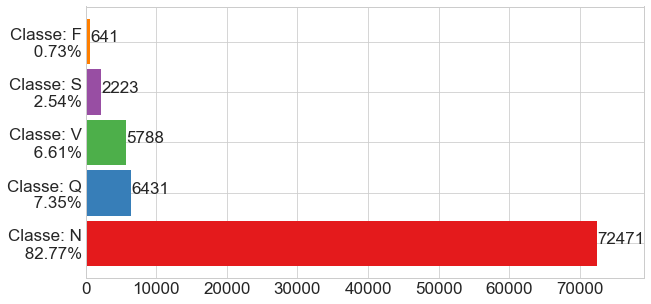

In [104]:
data_count = mitbih_train_0.label.astype(int).value_counts()
#Rename index to add percentage
new_index = ["Classe: " + NAME_DIC[k]+ "\n %.2f%%" %(v*100/N_train1) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]),fontsize = 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0,79000)
plt.show()
plt.show()

Les données sont fortement déséquilibrées. Particulièrement la classe "F" qui ne possèdent que 641 éléments (0.73% des données) dans l'apprentissage et la classe "N" qui est plus de 7 fois plus important (82.7% des données) que toutes les autres catégories.

Pour corriger cela, nous allons procéder à une augmentation de certaines classes et à  une réduction de la classe "N" afin de réequimibrer les classes aussi bien des données d'apprentissage que de validation.




# 5. Méthode d'augmentation des données
Pour augmenter les données, on peut pocéder à :
    * de l'oversampling, en dupliquant certaines séries (Amplify) 
    * de l'augmentation de données, en créant de nouveaux signaux par déformation des signaux existant (Stretch).
   
 En utilisant une de ces deux fonctions, ou en combinant les deux, il est alors possible de créer de nouveau signaux.


## 5.1 Amplify

Cette méthode permet d'amplifier le signal suivant la formule suivante : 

new_x =  $ -\alpha\cdot x^2 + (1+\alpha)\cdot x $ 
    
  avec   $-0.5<\alpha<0.5$

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

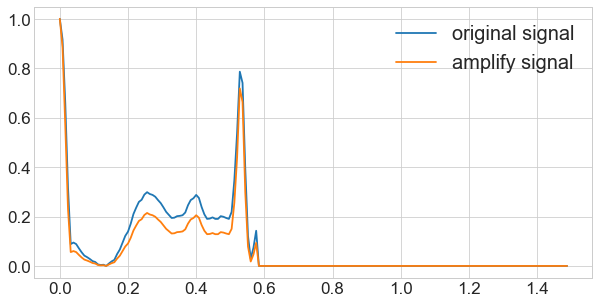

In [95]:
def amplify(x,alpha):
    coef = (alpha-0.5)
    factor = -coef*x + (1+coef)
    return x*factor

x_toy = mitbih_train_0.groupby("label").get_group(3).values[0,:-1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,x_toy, label = 'original signal', linewidth=1.8)
ax.plot(xsec,amplify(x_toy,np.random.rand()), label = 'amplify signal', linewidth=1.8)
plt.legend()
plt.legend(prop={'size': 20})
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

## 5.2 Stretch

Cette méthode étire ou "compresse" le signal. Cette étape est effectué grâce à la fonction *resample* du package *scipy.signal* qui permet de ré-echantilloner un signal à l'aide d'une transformée de Fourier.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

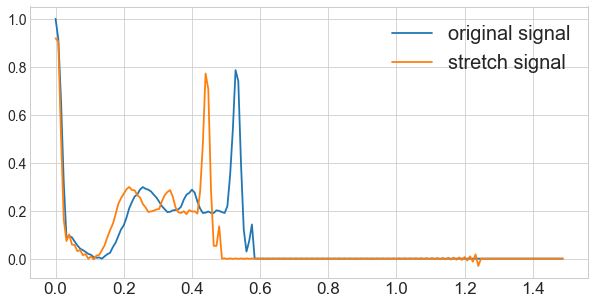

In [88]:
from scipy.signal import resample
def stretch(x,alpha):
    l = int(187 * (1 + (alpha-0.5)/3))
    y = sc.signal.resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,x_toy, label = 'original signal', linewidth=1.8)
ax.plot(xsec,stretch(x_toy,np.random.rand()), label = 'stretch signal', linewidth=1.8)
plt.legend(prop={'size': 20})
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)

# 6. Réequilibrage des classes

Nous nous aidons des deux méthodes, détaillées plus haut, d'augmentation des données pour générer de nouveaux signaux pour les classes les moins représentées et tout simplement équilibrer les classes de nos deux jeux de données. 

Pour la classe sur-représentée, nous allons garder que 10% de ces données. 

Les codes suivants détaillent les différentes étapes qui sont commentées au fur et à mesure pour faciliter la compréhension.

In [46]:
#Regroupement de chaque catégorie de l'échantillon Train
class0_train=mitbih_train_0.loc[mitbih_train_0.label == 0]
class1_train=mitbih_train_0.loc[mitbih_train_0.label == 1]
class2_train=mitbih_train_0.loc[mitbih_train_0.label == 2]
class3_train=mitbih_train_0.loc[mitbih_train_0.label == 3]
class4_train=mitbih_train_0.loc[mitbih_train_0.label == 4]

#Regroupement de chaque catégorie de l'échantillon Test
class0_test=mitbih_test_0.loc[mitbih_test_0.label == 0]
class1_test=mitbih_test_0.loc[mitbih_test_0.label == 1]
class2_test=mitbih_test_0.loc[mitbih_test_0.label == 2]
class3_test=mitbih_test_0.loc[mitbih_test_0.label == 3]
class4_test=mitbih_test_0.loc[mitbih_test_0.label == 4]

In [47]:
#Regroupement des valeurs de chaque catégorie de l'échantillon Train
X_train0=class0_train.values[:,:]
X_train1=class1_train.values[:,:]
X_train2=class2_train.values[:,:]
X_train3=class3_train.values[:,:]
X_train4=class4_train.values[:,:]

#Regroupement des valeurs de chaque catégorie de l'échantillon Train
X_test0=class0_test.values[:,:]
X_test1=class1_test.values[:,:]
X_test2=class2_test.values[:,:]
X_test3=class3_test.values[:,:]
X_test4=class4_test.values[:,:]


In [48]:
#Nombre de signaux à augmenter ou diminuer de chaque catégorie des deux échantillons 
N0_train=65000 # -65000
N1_train=3000
N3_train=7*641
N1_test=600
N3_test=7*162

In [49]:
### la position de la classe N à partir de laquelle on effectue une suppression des données
np.random.seed(11)
arr_train0=random.sample(range(X_train0.shape[0]),N0_train)

### Coefficient alpha pour les fontions d'augmentation des données
np.random.seed(111)   
arr_train1=np.random.rand(N1_train)
arr_train3=np.random.rand(N3_train)

arr_test1=np.random.rand(N1_test)
arr_test3=np.random.rand(N3_test)

In [50]:
### suppression de  65000 individus dans la classe N de l'échantillon d' apprentissage
X_train0=np.delete(X_train0,arr_train0,axis=0)

In [51]:
## Génération de  N1_train individus dans X1 par amplify et stretch
add_train1=np.zeros((N1_train,188))
add_train1[:,187]=1
for i in range(int(N1_train/2)):
    x=amplify(X_train1[i,:-1],arr_train1[i])
    y=stretch(X_train1[-i,:-1],arr_train1[i+1500])
    add_train1[i,:-1]=x
    add_train1[i+1500,:-1]=y

In [52]:
X_train1=np.concatenate((add_train1,X_train1),axis=0)#Concaténation avec les signaux précédents
X_train1.shape

(5223, 188)

In [53]:
## Génération de  N3_train individus dans X3 par amplify et stretch
n=641
add_train3=np.zeros((N3_train,188))
add_train3[:,187]=3
for i in range(n):
    x1=amplify(X_train3[i,:-1],arr_train3[i])
    y1=stretch(X_train3[i,:-1],arr_train3[i+n])
    x2=amplify(X_train3[i,:-1],arr_train3[i+n*2])
    y2=stretch(X_train3[i,:-1],arr_train3[i+n*3])
    x3=amplify(X_train3[i,:-1],arr_train3[i+n*4])
    y3=stretch(X_train3[i,:-1],arr_train3[i+n*5])
    y4=stretch(X_train3[i,:-1],arr_train3[i+n*6])
    add_train3[i,:-1]=x1
    add_train3[i+n,:-1]=y1
    add_train3[i+n*2,:-1]=x2
    add_train3[i+n*3,:-1]=y2
    add_train3[i+n*4,:-1]=x3
    add_train3[i+n*5,:-1]=y3
    add_train3[i+n*6,:-1]=y4   

In [54]:
X_train3=np.concatenate((add_train3,X_train3),axis=0)#Concaténation avec les signaux précédents
X_train3.shape

(5128, 188)

In [55]:
## Génération de N1_test individus dans X1 par amplify et stretch
add_test1=np.zeros((N1_test,188))
add_test1[:,187]=1
for i in range(int(N1_test/2)):
    x=amplify(X_test1[i,:-1],arr_test1[i])
    y=stretch(X_test1[-i,:-1],arr_test1[i+int(N1_test/2)])
    add_test1[i,:-1]=x
    add_test1[i+int(N1_test/2),:-1]=y 


In [56]:
X_test1=np.concatenate((add_test1,X_test1),axis=0)#Concaténation avec les signaux précédents
X_test1.shape

(1156, 188)

In [57]:
## Génération de N1_test et N3_test individus dans X3 par amplify et stretch
n=162
add_test3=np.zeros((N3_test,188))
add_test3[:,187]=3
for i in range(n):
    x1=amplify(X_test3[i,:-1],arr_test3[i])
    y1=stretch(X_test3[i,:-1],arr_test3[i+n])
    x2=amplify(X_test3[i,:-1],arr_test3[i+n*2])
    y2=stretch(X_test3[i,:-1],arr_test3[i+n*3])
    x3=amplify(X_test3[i,:-1],arr_test3[i+n*4])
    y3=stretch(X_test3[i,:-1],arr_test3[i+n*5])
    y4=amplify(X_test3[i,:-1],arr_test3[i+n*6])
    add_test3[i,:-1]=x1
    add_test3[i+n,:-1]=y1
    add_test3[i+n*2,:-1]=x2
    add_test3[i+n*3,:-1]=y2
    add_test3[i+n*4,:-1]=x3
    add_test3[i+n*5,:-1]=y3
    add_test3[i+n*6,:-1]=y4  

In [58]:
X_test3=np.concatenate((add_test3,X_test3),axis=0)#Concaténation avec les signaux précédents
X_test3.shape

(1296, 188)

In [59]:
#Concaténation de tous les vecteurs pour reconstituer l'échantillon d'apprentissage et celui de test avec des classes équilibrées
mitbih_train=pd.DataFrame(np.concatenate((X_train0,X_train1,X_train2,X_train3,X_train4),axis=0))
mitbih_test=pd.DataFrame(np.concatenate((X_test0,X_test1,X_test2,X_test3,X_test4),axis=0))

mitbih_train.columns=Colnames
mitbih_test.columns=Colnames

N_train = mitbih_train.shape[0]

# 7. Visualisation des échantillons de test et d'apprentissage après réequilibrage des classes

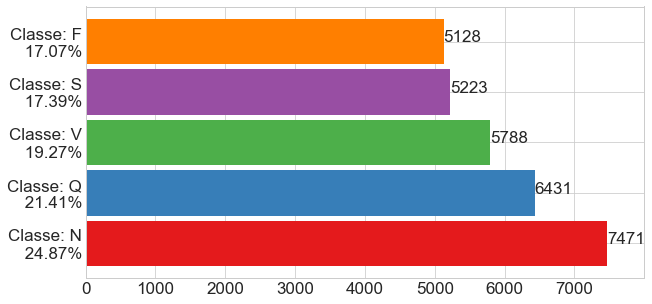

In [108]:
data_count = mitbih_train.label.astype(int).value_counts()
#Rename index to add percentage
new_index = ["Classe: " + NAME_DIC[k]+ "\n %.2f%%" %(v*100/N_train) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]),fontsize = 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0,7990)
plt.show()
plt.show()

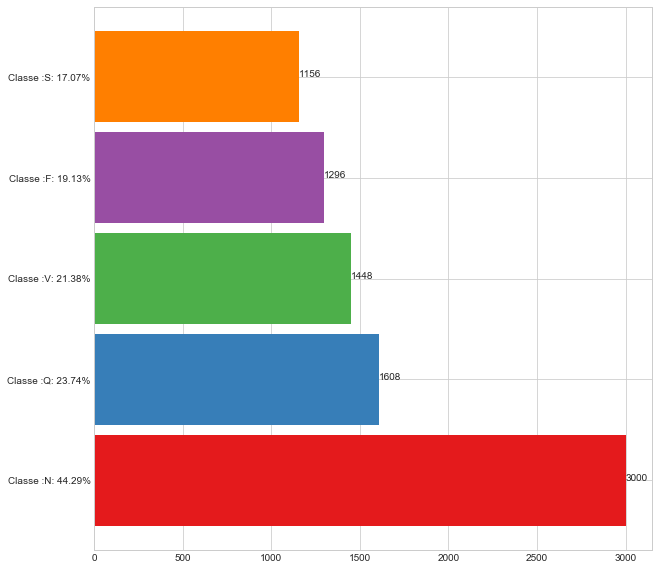

In [28]:
data_count = mitbih_test.label.astype(int).value_counts()
#Rename index to add percentage
new_index = ["Classe :" + NAME_DIC[k]+ ": %.2f%%" %(v*100/N_test) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (10,10))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]))
plt.show()

Les classes ainsi réequilibrées, nous pouvons passer à la création des features.

# 8. Création de Features


Cette section permet de créer de nouvelles variables ou "features" à partir de statistiques élémentaires : La *moyenne*, *la médiane* etc...
Afin de rendre ces features plus pertinentes, une technique consiste à créer ces features sur différentes divisions du signal. 

On va donc calculer pour chaque statistique (par exemple la moyenne) sa valeur sur l'ensemble de la courbe. On va ensuite découper le signal en deux, et calculer la moyenne sur la première et la seconde partie. On répète cette opération sur un découpage du signal en 4 divisions, puis en 8 et ainsi de suite pour différentes puissances de 2. 

Trois fonctions sont définies ci-dessous afin de créer ces nouvelles features.

* **basic_features** : Calcul des statistiques simples pour chacun des signaux contenus dans la matrice *X*.
* **basic_features_per_block** : Calcul des statistiques simples sur chaque division d'un partitionnement spécifique des signaux contenus dans la matrice X. 
Ce partitionnement peut être définies à partir d' **un des deux** paramètres :
    * n_block : Nombre de division.
    * n_step : Taille d'une division.
* **basic_features_dyadique** : Calcul des statistiques simples sur différents partitionnements des signaux contenus dans la matrice X. Les partitionnement générés sont tous les partitionnement en 2^i divisions du signal, pour i allant de 0 à *power* ou *power* est un argument de la fonction. 
    

In [29]:
# Suppression de la colonne label
X_train = mitbih_train.values[:,:-1]
Y_train = mitbih_train.values[:,-1]

X_test = mitbih_test.values[:,:-1]
Y_test = mitbih_test.values[:,-1]

In [82]:
X_train.shape[1]/2

93.5

In [103]:
X_train_fourier=np.abs(np.fft.fft(X_train,norm="ortho"))
X_test_fourier=np.abs(np.fft.fft(X_test,norm="ortho"))

In [104]:
X_train_fourier.shape

(30041, 187)

In [105]:
a=X_train_fourier[1,][::-1]
b=X_train_fourier[1,]

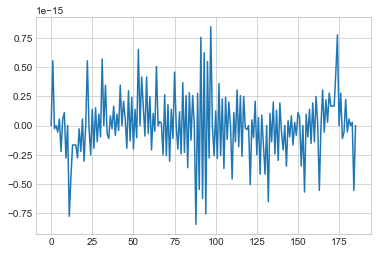

In [106]:
plt.plot(b[1:]-a[:-1])
plt.show()

In [107]:
a=X_train_fourier[1,:94][::-1]
b=X_train_fourier[1,94:]

In [100]:
a.shape

(94,)

In [101]:
b.shape

(93,)

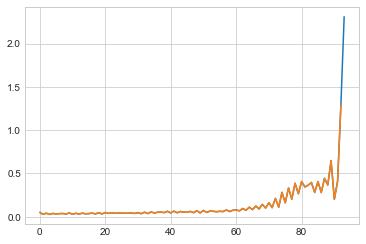

In [108]:
plt.plot(a[:94])
plt.plot(b)

plt.show()

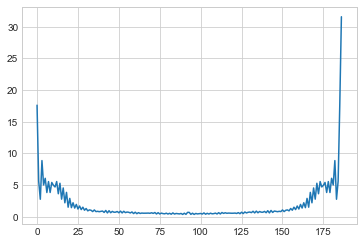

In [66]:
plt.plot(X_train_fourier[1,][::-1])
plt.show()

In [68]:
?np.fft.fft

In [65]:
reversed(X_train_fourier[1,])

In [63]:
X_train_fourier[1,]

array([ 31.58494208,  17.61833203,   5.61677608,   2.76070516,
         8.86705021,   5.01692289,   6.06857336,   3.82360329,
         5.55216552,   3.8302329 ,   5.41183825,   4.97605608,
         4.69914935,   5.5571749 ,   3.62839323,   5.28600942,
         2.77595474,   4.54256636,   2.19942973,   3.84601256,
         1.50587288,   2.89609534,   1.43602386,   2.20715434,
         1.37174876,   1.94454592,   1.21923841,   1.69288977,
         1.12581793,   1.50792392,   1.02880988,   1.29976063,
         0.92647837,   1.07869593,   1.02205332,   0.81574107,
         1.07120381,   0.81084669,   0.85788094,   0.79437478,
         0.85326678,   0.899071  ,   0.6811319 ,   0.99080568,
         0.60361209,   0.95133002,   0.63649894,   0.84175418,
         0.70994606,   0.71904245,   0.82719385,   0.62447244,
         0.88684445,   0.60228973,   0.8612743 ,   0.64717933,
         0.73931396,   0.70408361,   0.59480231,   0.75383091,
         0.50054769,   0.71571209,   0.47896328,   0.65

In [31]:
def basic_features(X):
    basic_features_list = []
    basic_features_list.append(np.mean(X, axis=1))
    basic_features_list.append(np.median(X, axis=1))
    basic_features_list.append(np.max(X, axis=1))
    basic_features_list.append(np.argmax(X, axis=1))
    basic_features_list.append(np.std(X ,axis=1))
    basic_features_list.append(np.apply_along_axis(sc.stats.entropy, 1, X))
    basic_features_list.append(np.apply_along_axis(sc.stats.skew, 1, X))
    basic_features_list.append(np.apply_along_axis(sc.stats.kurtosis, 1, X))

    X_bf = np.vstack(basic_features_list).T
    return X_bf



In [32]:
#Exemple sur un signal
X_test_bf = basic_features(X_test[:1,:])
print("All signal : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bf[0]))

All signal : Mean = 0.18, Median = 0.18, Max = 1.00, Argmax = 94.00, std = 0.20, entropy = 4.57, skew = 1.50, kurtosis = 3.39


In [33]:
def basic_features_per_block(X, n_block=None, n_step=None):
    N = X.shape[1]
    if not(n_block is None) and not(n_step is None):
        raise ValueError("You can't specify both n_block AND n_step")
    elif (n_block is None) and (n_step is None):
        raise ValueError("You have to specify  either n_block OR n_step")
    elif n_block is None:
        blocks = np.hstack((np.arange(0,N,n_step),N))
    else:
        blocks = np.linspace(0,N,n_block+1,dtype=int)
    basic_features_per_block = []
    n_blocks = len(blocks)-1
    for s_block, e_block in [blocks[k:k+2] for k in range(n_blocks)] :
        basic_features_per_block.append(basic_features(X[:,s_block:e_block]))
        
    return np.hstack(basic_features_per_block), blocks



In [34]:
#Exemple sur un signal
X_test_bfbloc = basic_features_per_block(X_test[:1,:], n_block=2)
print("First block  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bfbloc[0][0][:8]))
print("Second block : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bfbloc[0][0][8:]))

First block  : Mean = 0.29, Median = 0.30, Max = 0.94, Argmax = 0.00, std = 0.14, entropy = 4.43, skew = 1.70, kurtosis = 7.06
Second block : Mean = 0.07, Median = 0.00, Max = 1.00, Argmax = 1.00, std = 0.19, entropy = 2.67, skew = 3.55, kurtosis = 12.59


In [35]:
#LONG!
def basic_features_dyadique(X, power):
    N = X.shape[1]
    basic_features_dyatique = []
    for p in range(power+1):
        basic_features_dyatique.append(basic_features_per_block(X, n_block=2**p)[0])
    [print(k.shape) for k in basic_features_dyatique ]
    return np.hstack(basic_features_dyatique)



In [36]:
#Exemple sur un signal
X_test_dy = basic_features_dyadique(X_test[:1,:], power=1)
print("All Signal  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][:8]))
print("First block  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][8:16]))
print("Second block : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][16:]))

(1, 8)
(1, 16)
All Signal  : Mean = 0.18, Median = 0.18, Max = 1.00, Argmax = 94.00, std = 0.20, entropy = 4.57, skew = 1.50, kurtosis = 3.39
First block  : Mean = 0.29, Median = 0.30, Max = 0.94, Argmax = 0.00, std = 0.14, entropy = 4.43, skew = 1.70, kurtosis = 7.06
Second block : Mean = 0.07, Median = 0.00, Max = 1.00, Argmax = 1.00, std = 0.19, entropy = 2.67, skew = 3.55, kurtosis = 12.59


Nous choisissons de nous limiter à 2² divisions sur nos signaux et de générer nos features:

-Moyenne,

-Médiane,

-Max,

-Argmax,

-Ecart-type,

-Entropy,

-Skew et

-Kurtosis

sur nos différents découpages.


In [37]:
X_train_bfd=basic_features_dyadique(X_train,power=2)
X_test_bfd=basic_features_dyadique(X_test,power=2)

C:\Users\trillionaire\Anaconda3-5.0.1\lib\site-packages\scipy\stats\_distn_infrastructure.py:2505: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


(30041, 8)
(30041, 16)
(30041, 32)
(8508, 8)
(8508, 16)
(8508, 32)


In [38]:
X_train_bfd # visualisation des données d'apprentissage aptès génération des features

array([[ 0.16741596,  0.        ,  1.        , ...,        -inf,
         0.        , -3.        ],
       [ 0.08951649,  0.        ,  1.        , ...,        -inf,
         0.        , -3.        ],
       [ 0.0966282 ,  0.06947368,  1.        , ...,        -inf,
         0.        , -3.        ],
       ..., 
       [ 0.3569989 ,  0.44849247,  1.        , ...,        -inf,
         0.        , -3.        ],
       [ 0.27083027,  0.37614679,  1.        , ...,        -inf,
         0.        , -3.        ],
       [ 0.34623655,  0.41946697,  1.        , ...,        -inf,
         0.        , -3.        ]])

On se rend compte qu'il y'a des INF qui sont générés. Ceci est dû au calcul des variables sur des signaux nuls. Nous y remédions en les remplaçant par des zéros. Ce qui nous paraît raisonnable. 

In [39]:
## remplacer NaN ou inf par 0
X_train_bfd=np.where(np.isnan(X_train_bfd), 0, X_train_bfd)
X_test_bfd=np.where(np.isnan(X_test_bfd), 0, X_test_bfd)
X_train_bfd=np.where(np.isinf(X_train_bfd), 0, X_train_bfd)
X_test_bfd=np.where(np.isinf(X_test_bfd), 0, X_test_bfd)

# 9. Description multivariée

## 9.1 ACP

Nous faisons ici une description multivariée des données d'apprentissage par une Analyse en Composantes Principales.

In [40]:
N_train = mitbih_train.shape[0]
N_test = mitbih_test.shape[0]

In [41]:
def plot_variance_acp(fig, acp, X_acp, whis=1.5): 
    ax = fig.add_subplot(1,2,1)
    ax.bar(range(10), acp.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
    ax.set_xticks(range(10))
    ax.set_ylabel("Variance")
    ax.set_title("", fontsize=35)
    ax.set_title("Pourcentage de variance expliquee \n des premieres composantes", fontsize=20)
    
    ax = fig.add_subplot(1,2,2)
    box=ax.boxplot(X_acp[:,0:10], whis=whis)
    ax.set_title("Distribution des premieres composantes", fontsize=20)
    
def plot_pca(ax, X, acp, nbc, nbc2, colors, markersizes):
    ax.scatter(X[:,nbc-1],X[:,nbc2-1],marker=".", color= colors, s=markersizes)
    ax.set_xlabel("PC%d : %.2f %%" %(nbc,acp.explained_variance_ratio_[nbc-1]*100), fontsize=15)
    ax.set_ylabel("PC%d : %.2f %%" %(nbc2,acp.explained_variance_ratio_[nbc2-1]*100), fontsize=15)


In [42]:
import sklearn.decomposition as sdec 
pca = sdec.PCA()
X_r = pca.fit_transform(X_train_bfd)

Text(0.5,0.98,'Résultat ACP')

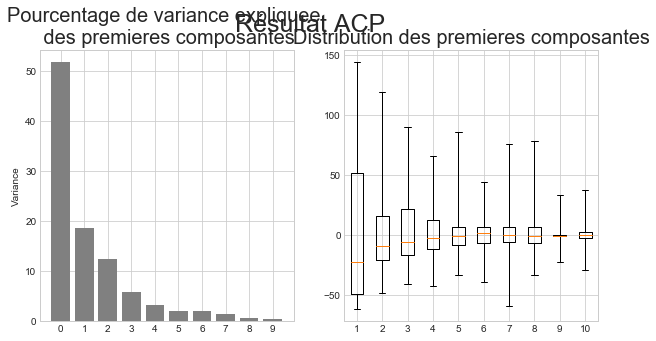

In [43]:
fig = plt.figure(figsize=(10,5))
plot_variance_acp(fig, pca, X_r, whis=100)
fig.suptitle("Résultat ACP", fontsize=25)

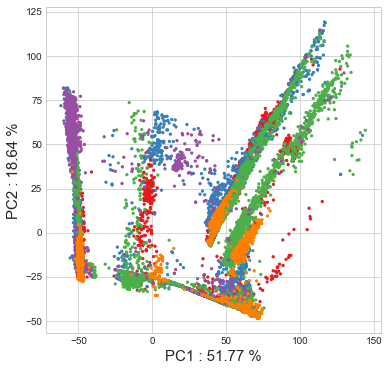

In [44]:
colors=[COLOR[int(y)] for y in mitbih_train.values[:,-1]]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(6,6), )
ax = fig.add_subplot(1,1,1)
plot_pca(ax,X_r, pca, 1, 2, colors, markersizes)

Les deux premiers axes expliquent presque 70% de la variance des données. Mais hélas, cette représentation des individus est illisible et est donnée à titre informatif.

Toutefois, nous remarquons des formes allongées et allignées de groupes d'individus, ceci peut s'expliquer par les amplifications et stretchings effectués précédemment pour augmenter nos classes d'individus.

## 9.2 AFD

De même, comme notre variable à prédire est qualitative, nous implémentons une analyse factorielle discriminante .

In [45]:
import sklearn.discriminant_analysis as sda
method = sda.LinearDiscriminantAnalysis() 
lda=method.fit(X_train_bfd,Y_train)
X_r2=lda.transform(X_train_bfd)

C:\Users\trillionaire\Anaconda3-5.0.1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


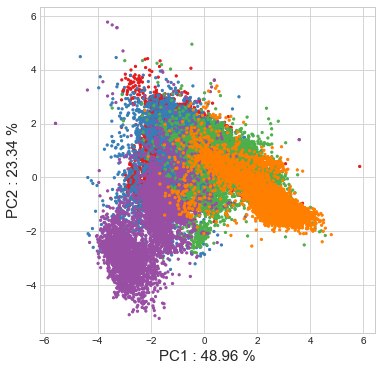

In [46]:
colors=[COLOR[int(y)] for y in mitbih_train.values[:,-1]]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(6,6), )
ax = fig.add_subplot(1,1,1)
plot_pca(ax,X_r2, lda, 1, 2, colors, markersizes)

Nous remarquons que les catégories sont mélangées hormis quelques individus ou outliers qui se détachent.
La représentation des individus est également donnée à titre informatif. 

Certaines méthodes sont sensibles à des effets de variance ou d'unité des variables. Il est préférable d'introduire une normalisation.

# 10. Normalisation des données

L'étape suivante est celle  de la standardisation des données ou normalisation. Les variables sont divisées par leur écart-type. Ce n'est pas utile dans le cas d'un modèle linéaire élémentaire car la solution est sensiblement identique mais indispensable pour beaucoup d'autres méthodes non linéaires (SVM, réseaux de neurones, modèles avec pénalisation). Cette étape est donc concrètement systématiquement exécutée pour éviter des soucis. 

Il faut noter que les mêmes paramètres  (moyennes, écarts-types) estimés sur l'échantillon d'apprentissage sont utilisés pour normaliser l'échantillon test. 


In [47]:
from sklearn.preprocessing import StandardScaler  
# normalisation des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train_bfd)  
Xr_train = scaler.transform(X_train_bfd)  
# Meme transformation sur l'échantillon test
Xr_test = scaler.transform(X_test_bfd)


# 11. Implémentation des méthodes et stratégies de prévision de classe





La recherche d'une meilleure méthode de prévision suit généralement le protocole suivant dont la première étape est déjà réalisée.

Etape descriptive préliminaire multidimensionnelle et l'étape de construction de variables, attributs ou features spécifiques des données.

Procéder à un tirage aléatoire d'un échantillon test qui ne sera utilisé que lors de la dernière étape de comparaison des méthodes.

La partie restante est l'échantillon d'apprentissage pour l'estimation des paramètres des modèles.
Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par validation croisée.
* Variables à prendre en compte dans la régression linéaire ou logistique;
* variables et méthode pour l'analyse discriminante;
* nombre de feuilles dans l'arbre de régression ou de classification;
* architecture (nombre de neurones, pénalisation) du perceptron;
* algorithme d'agrégation,
* noyau et pénalisation des SVMs.

Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test.

Dans cette partie, nous allons implémenté différents algorithmes pour essayer de prévoire  la catégorie des électrocardiogrammes.

## 11.1 Régression Logistique

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [49]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,1.2,1.5,2,3,3.5,4,5]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.174229, Meilleur paramètre = {'C': 5}


In [50]:
# erreur sur l'échantillon test
1-logitOpt.score(Xr_test, Y_test)


0.17806770098730607

In [51]:
logit_err=1-logitOpt.score(Xr_test, Y_test)

In [52]:
# Prévision
y_chap_logit = logitOpt.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_logit, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2437,168,95,193,107
1.0,222,762,84,76,12
2.0,83,44,1199,78,44
3.0,93,43,49,1111,0
4.0,56,24,37,7,1484


La régression logistique fait partie de la famille des modèles linéaires.

Les fonctions de modèles linéaires et linéaires généralisées sont limitées dans Scikit-learn et sans sorties numériques (tests) détaillées qui sont à rechercher dans une autre librairie (StatsModels). Dans les deux cas, les stratégies classiques (forward, backward, stepwise, Furnival et Wilson) de sélection de variables par optimisation d'un critère (Cp, AIC, BIC) ne semblent pas disponibles, même si AIC et BIC sont présents dans scikit-learn.

C'est la raison pour laquelle, nous avons introduit une pénalisation Lasso, qui est une pénalisation de type L1 pour opérer une sélection de variables mais sans analyse fine des interactions comme cela est possible avec R.

La valeur par défaut du paramètre de pénalisation Lasso est 1, mais c'est un paramètre que nous optimisons par validation croisée. Ici, c'est une validation croisée 10 segments qui est implémenté. Cette opération est parallélisée grâce à l'option n_jobs=-1.Les autres paramètres sont laissées par défaut.

Nous obtenons ainsi la valeur optimale de ce paramètre qui est 5 et l'estimation de l'erreur de prévision correspondante:17.8%.

Ce taux reste élevé et la matrice de confusion en témoigne. Aucune classe n'est totalement bien prédite.

## 11.2 Analyse Discriminante par K plus proches voisins : KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))

Meilleur score = 0.068939, Meilleur paramètre = {'n_neighbors': 1}


In [54]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-knnOpt.score(Xr_test,Y_test)


0.099083215796897051

In [55]:
knn_err=1-knnOpt.score(Xr_test,Y_test)

In [56]:
# Prévision de l'échantillon test
y_chap_knn = knnOpt.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_knn, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2715,122,55,66,42
1.0,150,922,28,46,10
2.0,45,19,1334,32,18
3.0,62,11,54,1162,7
4.0,38,12,24,2,1532


La fonction estimée "non paramétriquement" par l'algorithme des k plus proches voisins est celle de la  densité conditionnelle ( nombre de points dans l'éllipsoide).

Pour knn, le choix du nombre de voisins *n_neighbors* est optimisé par validation croisée 10 segments également et  parallélisée grâce à l'option n_jobs=-1.Les autres paramètres sont laissées par défaut.

Nous obtenons ainsi la valeur optimale de ce paramètre qui est 1 et l'estimation de l'erreur de prévision correspondante:9.9%.

Cette méthode conduit à un taux de prévision presque 3 fois moins important que le modèle logistique. On prédit mieux les classes.

## 11.3 Arbres de Décision :CART (Classification And Regression Tree)

In [57]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.153324, Meilleur paramètre = {'max_depth': 9}


In [58]:
# Estimation de l'erreur de prévision
1-treeOpt.score(Xr_test,Y_test)


0.15973201692524686

In [59]:
cart_err=1-treeOpt.score(Xr_test,Y_test)

In [60]:
# prévision de l'échantillon test
y_chap_tree = treeOpt.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_tree, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2648,122,95,92,43
1.0,250,796,44,50,16
2.0,105,47,1214,53,29
3.0,111,30,39,1112,4
4.0,117,32,75,5,1379


Différents paramètres contrôlent l'exécution de l'algorithme:  le nombre minimal d'observation par noeud, le nombre de validations croisées (par défaut 10), la profondeur maximale etc. En effet, es arbres de décision  sont bien implémentés dans scikit-learn mais avec une insuffisance pour leur élagage. Ce n'est pas une pénalisation de la complexité, et donc précisément le nombre de feuilles qui est optimisé, mais la profondeur globale de l'arbre au risque d'élaguer, à une profondeur donnée, des feuilles importantes ou de conserver des feuilles ambigües. Le critère  optimisé lors de la création d'un noeud de l'arbre est la minimisation de l'hétérogénéité des classes ou la maximisation de  l'homogénéité des classes.

Comme précédemment, la validation croisée permet d'optimiser le paramètre de profondeur maximale sur une grille avec une validation croisée 10 segments.On n'oublie pas de paraléliser ce traitement .Les autres paramètres sont laissées par défaut.

Nous obtenons ainsi la valeur optimale de ce paramètre qui est 9 et l'estimation de l'erreur de prévision correspondante:15.9%.

A ce stade, les k plus proches voisins fournissent de meilleurs résultat que le modèle logistique et les arbres de décision.

## 11.4 Réseau de neurones ou Neural Network

In [61]:
from sklearn.neural_network import MLPClassifier
param_grid=[{"hidden_layer_sizes":list([(6,),(7,),(8,),(10,),(13,),(15,),(20,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.099231, Meilleur paramètre = {'hidden_layer_sizes': (20,)}


In [62]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xr_test,Y_test)


0.10742830277385995

In [63]:
nn_err=1-nnetOpt.score(Xr_test,Y_test)

In [64]:
# prévision de l'échantillon test
y_chap_nnet = nnetOpt.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_nnet, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2694,117,46,71,72
1.0,177,913,18,36,12
2.0,50,27,1307,43,21
3.0,71,20,47,1153,5
4.0,42,7,29,3,1527


Il s'agit pour cette algorithme d'estimer un modèle de type perceptron avec en entrée les feautures et en sortie la variable à prévoir. 


Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première conciste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage convient parfaitement pour une application raisonnable du perceptron.  

D'autres façons déviter le sur-apprentissage:
choix du nombre de paramètres(nombre de couches, choix de la fonction de transfert...)et du nombre max d'itération par validation croisée.

En effet, la validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence :
nombre de neurones, le coeffiecient de pénalisation L2 (alpha) et éventuellement le nombre max d'itérations.


Le nombre max d'itérations par défaut (200) semble insuffisant. Il est fixé à 500, et la fonction d'activation est laissée par défaut: Relu en python. Seul le le nombre de neurones est optimisé par une validation croisé 10 segments.

Nous obtenons ainsi la valeur optimale de ce paramètre qui est 20 et l'estimation de l'erreur de prévision correspondante:10.7%.

Les réseaux de neurones fournissent une bonne prévision, même si la matrice de confusion est loin d'être diagonale.


## 11.5 Forêts Aléatoires ou Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Y_train)
print(1-rfFit.oob_score_)

0.056955494158


In [66]:
# erreur de prévision sur le test
1-rfFit.score(Xr_test,Y_test)

0.080042313117066333

In [67]:
param=[{"max_features":list(range(2,10,1)),'n_estimators':[100,150,200]}]
rf= GridSearchCV(RandomForestClassifier(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.058220, Meilleur paramètre = {'max_features': 9, 'n_estimators': 200}


In [68]:
# erreur de prévision sur le test
rf_err=1-rfOpt.score(Xr_test,Y_test)

In [69]:
1-rfOpt.score(Xr_test,Y_test)

0.081100141043723539

In [70]:
# prévision
y_chap_rf = rfFit.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_rf, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2832,73,33,44,18
1.0,154,950,23,24,5
2.0,43,16,1340,35,14
3.0,68,18,42,1165,3
4.0,44,6,17,1,1540


Avec les forêts aléatoires, nous optimisons par validation croisée 10 segments le nombres maximun de features à prendre en compte et le nombre d'arbres de la forêt.

Nous obtenons ainsi les valeurs optimales respectivement 9 et 150 et l'estimation de l'erreur de prévision correspondante:8.1%.

Le plus faible taux d'erreur jusqu'ici.
On remarque dès lors que les méthodes non linéaires semblent donner de meilleurs résultats.


## 11.6 Support Vector Machine (SVM) avec noyau rbf(radial basis function)

In [91]:
from sklearn.svm import SVC
param=[{"C":[0.4,0.6,0.8,1,1.4,2]}]
svmrbf= GridSearchCV(SVC(),param,cv=10,n_jobs=-1)#kernel par défaut= rbf
svmOptbf=svmrbf.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.147232, Meilleur paramètre = {'C': 2.0}


In [92]:
# erreur de prévision sur le test
1-svmOptbf.score(Xr_test,Y_test)

0.099318288669487553

In [93]:
svm_rbf_err=1-svmOptbf.score(Xr_test,Y_test)

In [94]:
# prévision de l'échantillon test
y_chap_svmG = svmOptbf.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_svmG, rownames=['True'], colnames=['Pred'])

Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2764,63,40,99,34
1.0,201,885,26,41,3
2.0,62,18,1313,45,10
3.0,54,15,38,1186,3
4.0,50,11,31,1,1515


Malgré les assurances théoriques concernant ce type d'algorithme, les résultats dépendant fortement du choix des paramètres, même en python.Le temps d'exécution pour les SVM est plus sensible au nombre d'observations  n= nombre de contraintes de notre optimisation (optimisation sous contraintes).

Nous nous limiterons d'abord au noyau gaussien (choix par défaut).

L'optimisation de la pénalisation (paramètre C) est recherchée sur une grille par validation croisée 10 segments. 

Nous obtenons ainsi la valeur optimale de ce paramètre qui est 2 et l'estimation de l'erreur de prévision correspondante:9.9%.

Ce taux est faible et donc acceptable par rapport aux autres méthodes.

## 11.7 Support Vector Machine (SVM) avec noyau linéaire (linear)

In [74]:
from sklearn.svm import SVC
param=[{"C":[0.4,0.6,0.8,1,1.4,2.]}]
svmlin= GridSearchCV(SVC(kernel='linear'),param,cv=10,n_jobs=-1)#kernel= linear
svmOpt=svmlin.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.147232, Meilleur paramètre = {'C': 2.0}


In [75]:
# erreur de prévision sur le test
1-svmOpt.score(Xr_test,Y_test)


0.15232722143864597

In [76]:
svm_lin_err=1-svmOpt.score(Xr_test,Y_test)

In [77]:
# prévision de l'échantillon test
y_chap_svmL = svmOpt.predict(Xr_test)
# matrice de confusion
pd.crosstab(Y_test, y_chap_svmL, rownames=['True'], colnames=['Pred'])


Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2517,147,68,184,84
1.0,218,835,33,63,7
2.0,91,45,1223,64,25
3.0,86,24,49,1137,0
4.0,54,16,36,2,1500


Nous réimplémentons la SVM avec cette fois ci un noyau linéaire. La pénalisation optimale est la même avec toute fois un taux d'erreur beaucoup plus élevé : 15.2%.


La SVM non- linéaire correspond mieux à notre problématique ici que celle linéaire.

## 11.8 Agrégation de modèle par modèle adaptatif: Extrem Gradient Boosting  (XGBOOST)

In [78]:
import xgboost as xgb
from sklearn.metrics import precision_score
import time

In [79]:
max_depth= [4,5,6,7,8,9,10]
min_child_weight = [1,2]
n_estimators=[100,150,200,250]

In [80]:
def xgboost(max_depth, min_child_weight,n_estimators):
    ts = time.time()
    xgboost=xgb.XGBClassifier(max_depth=max_depth,
       min_child_weight=min_child_weight,
       n_estimators=n_estimators,
       objective= 'multi:softprob',
       num_class=5, n_jobs=-1,cv=10)
    xgboost.fit(Xr_train, Y_train)
    score = xgboost.score(Xr_test, Y_test)
    ypred = xgboost.predict(Xr_test)
    te = time.time()
    t_total = te-ts
    return score,ypred,t_total    

In [81]:
result=[]
Y_predict=[]
for i in range(len(max_depth)):
    for j in range(len(min_child_weight)):
        for k in range(len(n_estimators)):
            score,ypred,t_total=xgboost(max_depth[i], min_child_weight[j],n_estimators[k])
            Y_predict.append(ypred)
            result.append([score,max_depth[i],min_child_weight[j],n_estimators[k],t_total])

In [82]:
result=pd.DataFrame(result)
result.columns=["Score", "max_depth", "min_child_weight", "n_estimators","time"]
n=np.argmax(result.values[:,0])

In [83]:
print('Tous les essaies:')
result

Tous les essaies:


,Score,max_depth,min_child_weight,n_estimators,time
0,0.883639,4,1,100,24.230987
1,0.896450,4,1,150,34.823547
2,0.904795,4,1,200,42.916110
3,0.909614,4,1,250,53.999104
4,0.883639,4,2,100,21.536242
5,0.897273,4,2,150,32.084983
6,0.905148,4,2,200,42.822845
7,0.909967,4,2,250,53.597450
8,0.899154,5,1,100,27.346045
9,0.910085,5,1,150,40.432746


In [84]:
print('Le mmeilleur score: \n',result.loc[[n]])
print ('\n')
print('Erreur de prévision: %f \t temps: %f' %(1-result.values[n,0],result.values[n,4]))

Le mmeilleur score: 
       Score  max_depth  min_child_weight  n_estimators        time
43  0.92748          9                 1           250  122.547599


Erreur de prévision: 0.072520 	 temps: 122.547599


In [85]:
xgboost_err=1-result.values[n,0]
y_pred_xgb=Y_predict[n]
pd.crosstab(Y_test, y_pred_xgb, rownames=['True'], colnames=['Pred'])

Pred,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,2853,69,31,34,13
1.0,142,966,20,25,3
2.0,34,17,1356,30,11
3.0,62,19,43,1167,5
4.0,35,8,14,2,1549


On implémente XGB en optimisant les trois paramètres: profondeur, nombre d'arbres, et somme minimale du poids de l'instance dans un noeud, les autres paramètres sont laissés par défaut. L'optimisation des paramètres est faite manuellement avec une validation croisée de 10 segments.

Le meilleur modèle retenu est celui de profondeur 9, de somme minimale du poids de l'instance dans un noeud égale à 1 et avec 250 arbres. Il donne 7.2% d'erreur. Ce taux est très faible par rapport aux méthodes précédentes.

# 12. Récapitulation des erreurs des différentes méthodes

In [89]:
print("Régression Logistique:  %f" % logit_err)
print("Analyse Discriminante par KNN:  %f" % knn_err)
print("Arbres de décision:  %f" % cart_err)
print("Réseau de Neurones:  %f" % nn_err)
print("Forêts Aléatoires:  %f" % rf_err)
print("Séparateur à Vaste Marge (RBF):  %f" % svm_rbf_err)
print("Séparateur à Vaste Marge (Linear):  %f" % svm_lin_err)
print("Extrem Gradient Boosting:  %f" % xgboost_err)


Régression Logistique:  0.178068
Analyse Discriminante par KNN:  0.099083
Arbres de décision:  0.159732
Réseau de Neurones:  0.107428
Forêts Aléatoires:  0.081100
Séparateur à Vaste Marge (RBF):  0.152327
Séparateur à Vaste Marge (Linear):  0.152327
Extrem Gradient Boosting:  0.072520


# Conclusion

Dans ce projet, nous avons préparer les données en réequilibrant nos classes et en créant nos features. 

Nous avons ensuite normalisé les données sur lesquelles nous avons testé 8 méthodes de prévisions regroupées en deux grandes classes:

* celles linéaires: Régression Logistique, SVM linéaire,

* celles non linéaires: k plus proches voisins, arbres de décision, réseau de neurones, forêts aléatoires , SVM avec noyau gaussien et xgboost.

Sur nos données, les méthodes non-linéaires marchent mieux que les méthodes linéaires. En effet,  Extrem Gradient Boosting donne le meilleur taux d'erreur avec juste 7.2% d'erreur suivi des Forêts Aléatoires avec 8.1%, les k lus proches voisins et SVM avec noyau gaussien(9.9%),les réseaux de neuronnes (10.7%) suivent. Ces algorithmes présentent des taux d'erreur entre 5 et 10% maximum, tandisque les méthodes non linéaires donnent des taux entre 15% pour les arbres de décision et la SVM linéaire et pouvant aller jusqu'à 17% pour la régression logistique. Ces derniers font presque 3 fois plus d'erreur que le meilleur des algorithmes non linéaires.

Toutefois, le temps d'exécution est très long quelque soit la méthode,environ 1 heure.Ceci est également lier aux 56 variables ou features que nous prenons en compte. Nous avons également tenté de les augmenter, de passer à une division dyadique de puissqnce 3, ce qui donne 120 features. Sur des échantillons test et d'apprentissage identiques, ce dernier n'améliore que faiblement les taux de prédiction.

Pour aller plus loin et essayer d'améliorer les résultats,on pourrait utiliser toutes les données et couper la classe N en 10 echantillons de taille 7.000 individus chacun, ensuite croiser chacun avec 4 autres classes pour former 10 échantillons d'apprentissage (comme le principe de bagging), faire apprendre sur ces 10 echantillons et prendre la moyenne de l'erreur de prévision. Ce processus n'a pas été testé faute de temps et de puissance de calcul de nos machines.